In [1]:
import pandas as pd
import numpy as np
import scipy
import os
import matplotlib.pyplot as plt

In [2]:
import pickle
import numpy as np
import matplotlib
import matplotlib.path as mplPath
import matplotlib.pyplot as plt
import os
import math
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors


name = '2025_01_22_22_53_000SAC'#'2024_11_04_16_24_37' #'2024_06_11_15_11_25' 
env_name = 'myoTorsoReachFixed-v1'
steps = 1000
cut = 100

pkl_path = './output/PKL/' + env_name + '/'
ep = 100


def load_pickle(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

image_path = './image/' + env_name + '/' + name
os.makedirs(image_path, exist_ok=True)

bins = [0, 2, 4, 6, 8, 10]
bins_high = [20, 22, 24, 26, 28, 30]

In [3]:
AP_pert = []
stand = []
fall = []
pert_1_AP, pert_2_AP, pert_3_AP, pert_4_AP, pert_5_AP = [], [], [], [], []
pert_1_AP_high, pert_2_AP_high, pert_3_AP_high, pert_4_AP_high, pert_5_AP_high = [], [], [], [], []
for i in range(ep):
    file_path = pkl_path + name+f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    height = data['bodyInfo']['height']
    if height[-1] > 0.5:
        filtered_data = {
            'modelInfo': data['modelInfo'],
            'bodyInfo': data['bodyInfo'],
            'jointInfo':data['jointInfo']
        }
        stand.append(filtered_data)
    
print(len(stand))
mass = 150

96


In [4]:
pert_AP = [pert_1_AP, pert_2_AP, pert_3_AP, pert_4_AP, pert_5_AP]
pert_AP_high = [pert_1_AP_high, pert_2_AP_high, pert_3_AP_high, pert_4_AP_high, pert_5_AP_high]
for data in stand:
    AP_pert.append(data)
    #data['jointInfo']['qacc'] = np.array(data['jointInfo']['qacc'])
    p_t = int(data['modelInfo']['perturbationTime']*100)
    acc = max(abs(arr[0]) for arr in data['jointInfo']['qacc']['slide_joint'][p_t: p_t + 20])
    if  acc < 10:
        pert_1_AP.append(data)
    elif bins_high[0] <= acc <= bins_high[5]:
        pert_1_AP_high.append(data)

In [5]:
name_80 = '2025_01_24_00_17_040SAC'#'2024_11_04_16_24_37' #'2024_06_11_15_11_25' 
name_60 = '2025_01_24_22_03_170SAC'
name_40 = '2025_01_25_12_05_250SAC'
old_env_name = 'myoSarcTorsoReachFixed-v1'
pkl_path = './output/PKL/' + old_env_name + '/'
ep = 60

stand_80, stand_60, stand_40 = [], [], []
fall_80, fall_60, fall_40 = [], [], []

for i in range(ep):
    file_path = pkl_path + name_80 +f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    height = data['bodyInfo']['height']
    if height[-1] > 0.5:
        filtered_data = {
            'modelInfo': data['modelInfo'],
            'bodyInfo': data['bodyInfo'],
            'jointInfo':data['jointInfo']
        }
        stand_80.append(filtered_data)

In [6]:
for i in range(ep):
    file_path = pkl_path + name_60 +f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    height = data['bodyInfo']['height']
    if height[700] > 0.5:
        filtered_data = {
            'modelInfo': data['modelInfo'],
            'bodyInfo': data['bodyInfo'],
            'jointInfo':data['jointInfo']
        }
        stand_60.append(filtered_data)

In [7]:
for i in range(ep):
    file_path = pkl_path + name_40 +f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    height = data['bodyInfo']['height']
    if height[700] > 0.5:
        filtered_data = {
            'modelInfo': data['modelInfo'],
            'bodyInfo': data['bodyInfo'],
            'jointInfo':data['jointInfo']
        }
        stand_40.append(filtered_data)
    
print(len(stand_80), len(stand_60))
mass = 150

60 43


In [8]:
pert_80_AP, pert_60_AP, pert_40_AP = [], [], []
pert_80_AP_high, pert_60_AP_high, pert_40_AP_high = [], [], []

for data in stand_80:
    #data['jointInfo']['qacc'] = np.array(data['jointInfo']['qacc'])
    p_t = int(data['modelInfo']['perturbationTime']*100)
    acc = max(abs(arr[0]) for arr in data['jointInfo']['qacc']['slide_joint'][p_t: p_t + 20])
    if acc <= 10:
        pert_80_AP.append(data)
    elif  20 <= acc <= 30:
        pert_80_AP_high.append(data)    


for data in stand_60:
    #data['jointInfo']['qacc'] = np.array(data['jointInfo']['qacc'])
    p_t = int(data['modelInfo']['perturbationTime']*100)
    acc = max(abs(arr[0]) for arr in data['jointInfo']['qacc']['slide_joint'][p_t: p_t + 20])
    if acc <= 10:
        pert_60_AP.append(data)
    elif  20 <= acc <= 30:
        pert_60_AP_high.append(data)    

for data in stand_40:
    #data['jointInfo']['qacc'] = np.array(data['jointInfo']['qacc'])
    p_t = int(data['modelInfo']['perturbationTime']*100)
    acc = max(abs(arr[0]) for arr in data['jointInfo']['qacc']['slide_joint'][p_t: p_t + 20])
    if acc <= 10:
        pert_40_AP.append(data)
    elif  20 <= acc <= 30:
        pert_40_AP_high.append(data)   

pert_AP_old = [pert_80_AP, pert_60_AP, pert_40_AP]

pert_AP_old_high = [pert_80_AP_high, pert_60_AP_high, pert_40_AP_high]


In [9]:
plt.rcParams.update({
    "font.family": "Arial",  # specify font family here
    "font.size":15}) 

time_len = 300

x_time = np.arange(0, time_len*10, 10)

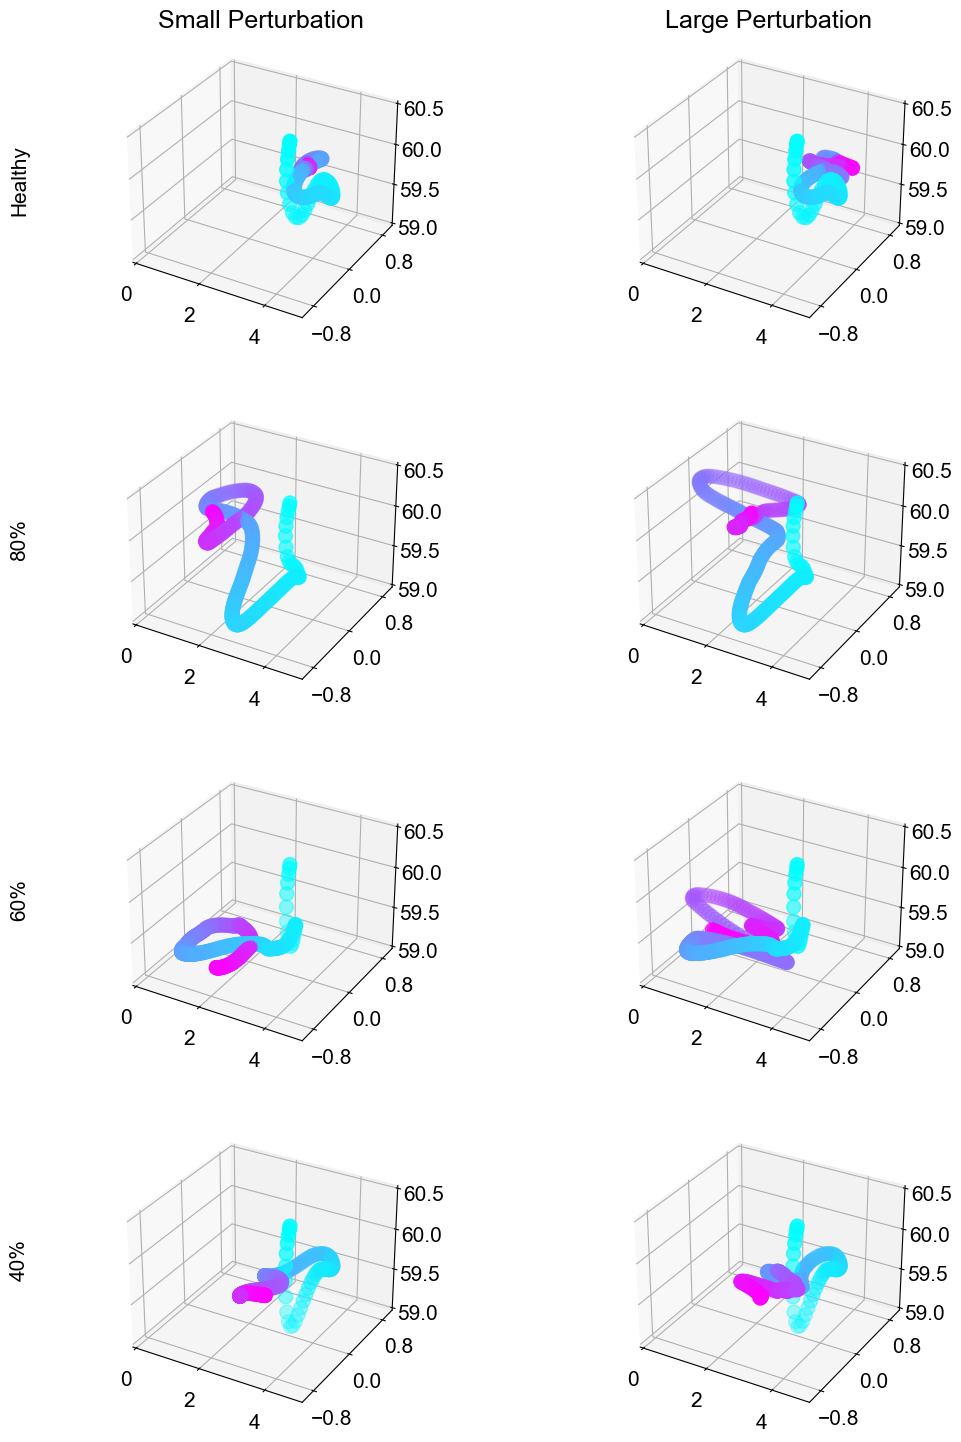

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import MaxNLocator, MultipleLocator

fig = plt.figure(figsize=(12, 18))


def compute_COM(dict):
    COM_healthy_low = []

    for i in dict:
        # Combine 'com' and 'height' into complete 3D points
        com_temp = [np.append(sublist, i['bodyInfo']['height'][j]) for j, sublist in enumerate(i['bodyInfo']['com'])]
        COM_healthy_low.append(com_temp)

    COM_healthy_low_np = np.array(COM_healthy_low)

    mean_COM = np.mean(COM_healthy_low_np, axis=0)
    return mean_COM[:300]

#healthy_COM_low = compute_COM(pert_1_AP)
# Create a 3D subplot
ax = plt.subplot(4, 2, 1, projection='3d')

timesteps = np.linspace(0, 1, 300)  # Generate values from 0 to 1
colors = cm.cool(timesteps)  # Map these values to the viridis colormap

com_array = [pert_1_AP, pert_1_AP_high, pert_80_AP, pert_80_AP_high, pert_60_AP, pert_60_AP_high, pert_40_AP, pert_40_AP_high]


for index, i in enumerate(com_array):
    if index == 1:
        ax.set_title('Small Perturbation')
    elif index == 2:
        ax.set_title('Large Perturbation')
    ax = plt.subplot(4, 2, index + 1, projection='3d')
    com_traj = compute_COM(i)
    ax.scatter(com_traj[:, 0]*100, com_traj[:, 1]*100, com_traj[:, 2]*100, c=colors, s=100)

    ax.set_xlim([0, 5])
    ax.set_ylim([-1, 1])
    ax.set_zlim([59, 60.5])


    plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=3)) 
    plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=3)) 
    plt.gca().zaxis.set_major_locator(MaxNLocator(nbins=3)) 
fig.text(0.1, 0.8, 'Healthy', va='center', ha='center', rotation=90)
fig.text(0.1, 0.6, '80%', va='center', ha='center', rotation=90)
fig.text(0.1, 0.4, '60%', va='center', ha='center', rotation=90)
fig.text(0.1, 0.2, '40%', va='center', ha='center', rotation=90)

plt.show()